In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
import category_encoders as ce
from sklearn.impute import KNNImputer

In [69]:
filename1 = "63/other_train.csv"
df1 = pd.read_csv(filename1, sep=',')
df1.head()

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Raymond Goode,"10979 Jeffrey Trace\r\nThomastown, WY 01984",White,NaN,Tech-support,f,9.0,Not-in-family,-0.551845,...,NaN,NaN,0.0,52.774565,<=50K,"{'mean_oxygen':'2.220735786','std_oxygen':'13....",United-States,42.0,0.0,Private
1,1,Duane Rust,"172 James Underpass\r\nNorth Daniel, DE 77866",White,Married-civ-spouse,Sales,f,10.0,Husband,0.742840,...,Some-college,205724.0,0.0,51.763432,>50K,"{'mean_oxygen':'15.67809365','std_oxygen':'50....",United-States,24.0,0.0,Private
2,2,Willie Flowers,"403 Snow Spring Apt. 484\r\nJonathanview, NH 9...",White,Married-civ-spouse,Prof-specialty,f,16.0,Husband,0.618000,...,Doctorate,214627.0,1.0,46.480033,>50K,"{'mean_oxygen':'0.8486622070000001','std_oxyge...",United-States,60.0,0.0,Self-emp-inc
3,3,Joseph Brumleve,"8610 Marks Stravenue Apt. 073\r\nNew Michael, ...",White,Divorced,Craft-repair,f,10.0,Own-child,1.716127,...,Some-college,213179.0,0.0,39.304941,>50K,"{'mean_oxygen':'2.877926421','std_oxygen':'18....",United-States,40.0,0.0,Private
4,4,James Barwick,"04945 Rebecca Walks\r\nLake Brett, ND 86641",White,Separated,Other-service,f,4.0,Unmarried,1.183415,...,7th-8th,155701.0,0.0,39.307106,<=50K,"{'mean_oxygen':'1.746655518','std_oxygen':'16....",Peru,38.0,0.0,Private


In [70]:
filename2 = "63/personal_train.csv"
df2 = pd.read_csv(filename2, sep=',')
df2.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",44,Male,1975-10-14
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",51,male,68-08-01
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",53,Male,1966-08-13
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",53,Male,1966-04-08 00 00 00
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",66,Female,1953-02-19


In [71]:
print(df1.nunique())

Unnamed: 0          3983
name                3933
address             3933
race                   5
marital-status         7
occupation            15
pregnant               6
education-num         16
relationship           6
skewness_glucose    3933
mean_glucose        3057
capital-gain          74
kurtosis_glucose    3930
education             23
fnlwgt              3665
class                  2
std_glucose         3931
income                 2
medical_info        3933
native-country        38
hours-per-week        73
capital-loss          50
workclass              9
dtype: int64


In [72]:
print(df2.nunique())

Unnamed: 0       3933
name             3933
address          3933
age               185
sex                 4
date_of_birth    3722
dtype: int64


In [73]:
# Funkcia na odstranenie duplikatov podla mena a nasledne usporiadanie
def vymaz_duplikaty(data):
    dups = data.duplicated('name')

    if (dups.any()==True):
        data = data.drop_duplicates('name')
    data = data.reset_index(drop=True)
    return data

In [74]:
df1 = vymaz_duplikaty(df1)
df1

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Raymond Goode,"10979 Jeffrey Trace\r\nThomastown, WY 01984",White,NaN,Tech-support,f,9.0,Not-in-family,-0.551845,...,NaN,NaN,0.0,52.774565,<=50K,"{'mean_oxygen':'2.220735786','std_oxygen':'13....",United-States,42.0,0.0,Private
1,1,Duane Rust,"172 James Underpass\r\nNorth Daniel, DE 77866",White,Married-civ-spouse,Sales,f,10.0,Husband,0.742840,...,Some-college,205724.0,0.0,51.763432,>50K,"{'mean_oxygen':'15.67809365','std_oxygen':'50....",United-States,24.0,0.0,Private
2,2,Willie Flowers,"403 Snow Spring Apt. 484\r\nJonathanview, NH 9...",White,Married-civ-spouse,Prof-specialty,f,16.0,Husband,0.618000,...,Doctorate,214627.0,1.0,46.480033,>50K,"{'mean_oxygen':'0.8486622070000001','std_oxyge...",United-States,60.0,0.0,Self-emp-inc
3,3,Joseph Brumleve,"8610 Marks Stravenue Apt. 073\r\nNew Michael, ...",White,Divorced,Craft-repair,f,10.0,Own-child,1.716127,...,Some-college,213179.0,0.0,39.304941,>50K,"{'mean_oxygen':'2.877926421','std_oxygen':'18....",United-States,40.0,0.0,Private
4,4,James Barwick,"04945 Rebecca Walks\r\nLake Brett, ND 86641",White,Separated,Other-service,f,4.0,Unmarried,1.183415,...,7th-8th,155701.0,0.0,39.307106,<=50K,"{'mean_oxygen':'1.746655518','std_oxygen':'16....",Peru,38.0,0.0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,3978,Thomas Busby,"9874 Sanchez Corner\r\nPort Javierbury, CA 90755",White,Married-civ-spouse,Protective-serv,f,9.0,Husband,-0.461129,...,HS-grad,112139.0,0.0,58.849650,<=50K,"{'mean_oxygen':'1.883779264','std_oxygen':'15....",United-States,40.0,0.0,State-gov
3929,3979,Christian King,"0896 Samantha Hill Apt. 342\r\nAmandafort, CA ...",White,Married-civ-spouse,Sales,f,9.0,Husband,4.056839,...,HS-grad,268831.0,1.0,38.294519,<=50K,"{'mean_oxygen':'6.010033445','std_oxygen':'30....",United-States,53.0,0.0,Self-emp-not-inc
3930,3980,James Granda,"223 Meyer Trace\r\nRachelview, NE 65834",White,Divorced,Adm-clerical,f,9.0,Unmarried,-0.420055,...,HS-grad,31838.0,1.0,74.106670,<=50K,"{'mean_oxygen':'146.75','std_oxygen':'65.58762...",United-States,40.0,0.0,Federal-gov
3931,3981,Steven Alter,Unit 0536 Box 1509\r\nDPO AA 59094,Black,Never-married,Prof-specialty,f,10.0,Not-in-family,-0.069299,...,Some-college,143570.0,0.0,49.485732,<=50K,"{'mean_oxygen':'2.256688963','std_oxygen':'12....",United-States,40.0,0.0,Local-gov


In [75]:
df2 = vymaz_duplikaty(df2)
df2

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",44,Male,1975-10-14
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",51,male,68-08-01
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",53,Male,1966-08-13
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",53,Male,1966-04-08 00 00 00
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",66,Female,1953-02-19
...,...,...,...,...,...,...
3928,3928,Douglas Starkweather,"8582 Lee Roads\r\nCostaburgh, SC 21897",??,Male,1964-06-21 00 00 00
3929,3929,Christopher Winfield,68430 Erik Terrace Suite 279\r\nPort Adamborou...,33,Female,1986-02-09 00:00:00
3930,3930,Salvador Donnell,Unit 8416 Box 3801\r\nDPO AE 31166,-5900,Female,1960-09-04
3931,3931,Wesley Goldstein,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",54,Female,04/09/1965


In [76]:
# Funkcia na spojenie tabuliek do jednej na zaklade mena a adresy, plus odstrani zbytocny stlpec
def joinni_tabulky(data1,data2):
    data1.drop(['Unnamed: 0'], axis=1, inplace=True)
    data2.drop(['Unnamed: 0'], axis=1, inplace=True)
    data = pd.merge(data2,data1,how='left',left_on=['name','address'],right_on=['name','address'])    
    return data

In [77]:
new_df = joinni_tabulky(df1,df2)

In [78]:
new_df

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,education,fnlwgt,class,std_glucose,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",44,Male,1975-10-14,White,Never-married,Sales,f,6.0,...,10th,181608.0,0.0,55.728851,<=50K,"{'mean_oxygen':'3.797658863','std_oxygen':'20....",United-States,12.0,0.0,Self-emp-inc
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",51,male,68-08-01,White,Never-married,Sales,f,13.0,...,Bachelors,361493.0,0.0,49.028790,<=50K,"{'mean_oxygen':'1.97826087','std_oxygen':'18.2...",United-States,40.0,0.0,Private
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",53,Male,1966-08-13,White,Married-civ-spouse,Craft-repair,f,9.0,...,HS-grad,289390.0,0.0,49.337327,<=50K,"{'mean_oxygen':'3.693979933','std_oxygen':'20....",United-States,47.0,0.0,Private
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",53,Male,1966-04-08 00 00 00,White,Married-civ-spouse,Protective-serv,f,9.0,...,HS-grad,155781.0,0.0,45.452735,<=50K,"{'mean_oxygen':'2.481605351','std_oxygen':'18....",United-States,50.0,0.0,Local-gov
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",66,Female,1953-02-19,White,Divorced,Exec-managerial,f,10.0,...,Some-college,424012.0,0.0,49.720014,<=50K,"{'mean_oxygen':'1.18729097','std_oxygen':'10.4...",United-States,40.0,0.0,Federal-gov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Douglas Starkweather,"8582 Lee Roads\r\nCostaburgh, SC 21897",??,Male,1964-06-21 00 00 00,White,Divorced,Transport-moving,f,9.0,...,HS-grad,300777.0,0.0,51.842573,<=50K,"{'mean_oxygen':'1.390468227','std_oxygen':'15....",United-States,70.0,0.0,Self-emp-not-inc
3929,Christopher Winfield,68430 Erik Terrace Suite 279\r\nPort Adamborou...,33,Female,1986-02-09 00:00:00,White,Married-civ-spouse,Sales,f,9.0,...,HS-grad,292590.0,0.0,47.339653,<=50K,"{'mean_oxygen':'7.193143813','std_oxygen':'29....",United-States,25.0,0.0,Private
3930,Salvador Donnell,Unit 8416 Box 3801\r\nDPO AE 31166,-5900,Female,1960-09-04,White,Married-civ-spouse,Adm-clerical,f,9.0,...,HS_grad,343052.0,0.0,50.167471,<=50K,"{'mean_oxygen':'1.852842809','std_oxygen':'12....",United-States,40.0,0.0,Federal-gov
3931,Wesley Goldstein,"34420 Brian Stream\r\nLake Michaeltown, MS 01832",54,Female,04/09/1965,White,Married-civ-spouse,Adm-clerical,FALSE,9.0,...,HS-grad,174391.0,0.0,50.253774,<=50K,"{'mean_oxygen':'5.472408027','std_oxygen':'27....",United-States,40.0,0.0,Self-emp-not-inc


In [79]:
print(new_df.shape)

(3933, 25)


In [80]:
new_df.columns

Index(['name', 'address', 'age', 'sex', 'date_of_birth', 'race',
       'marital-status', 'occupation', 'pregnant', 'education-num',
       'relationship', 'skewness_glucose', 'mean_glucose', 'capital-gain',
       'kurtosis_glucose', 'education', 'fnlwgt', 'class', 'std_glucose',
       'income', 'medical_info', 'native-country', 'hours-per-week',
       'capital-loss', 'workclass'],
      dtype='object')

In [81]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   address           3933 non-null   object 
 2   age               3681 non-null   object 
 3   sex               3933 non-null   object 
 4   date_of_birth     3933 non-null   object 
 5   race              3927 non-null   object 
 6   marital-status    3926 non-null   object 
 7   occupation        3929 non-null   object 
 8   pregnant          3926 non-null   object 
 9   education-num     3919 non-null   float64
 10  relationship      3925 non-null   object 
 11  skewness_glucose  3928 non-null   float64
 12  mean_glucose      3533 non-null   float64
 13  capital-gain      3929 non-null   float64
 14  kurtosis_glucose  3920 non-null   float64
 15  education         3927 non-null   object 
 16  fnlwgt            3926 non-null   float64


In [82]:
# Funkcia pre upravenie adresy - treba odstrániť nadbytočné znaky \r\n, ktoré nahradíme čiarkou s medzerou
def uprav_adresu(data):
    data['address'] = data['address'].str.replace('\r\n', ', ')
    return data

new_df = uprav_adresu(new_df)
new_df['address']

0       7183 Osborne Ways Apt. 651, East Andrew, OH 53211
1       391 Ball Road Suite 961, Flowersborough, IN 57550
2            8702 Vincent Square, New Jerryfurt, CO 30614
3            2751 Harris Crossroad, West Ashley, CA 30311
4        904 Robert Cliffs Suite 186, West Kyle, CO 77139
                              ...                        
3928                 8582 Lee Roads, Costaburgh, SC 21897
3929    68430 Erik Terrace Suite 279, Port Adamborough...
3930                     Unit 8416 Box 3801, DPO AE 31166
3931       34420 Brian Stream, Lake Michaeltown, MS 01832
3932                     Unit 7931 Box 0601, DPO AE 50505
Name: address, Length: 3933, dtype: object

In [83]:
# Funkcia pre upravenie pohlavia - v dátach bolo viacero označení male a female - ponecháme len Male a Female
def uprav_pohlavie(data):
    data['sex'] = data['sex'].str.strip()
    data['sex'] = data['sex'].str.replace('male', 'Male')
    data['sex'] = data['sex'].str.replace('feMale', 'Female')
    data['sex'] = data['sex'].str.replace('FeMale', 'Female')
    return data

In [84]:
new_df = uprav_pohlavie(new_df)
new_df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [85]:
# Funkcia pre upravenie stĺpca pregnant - znova viacero hodnôt - ponecháme len F a T
def uprav_tehotna(data):
    data['pregnant'] = data['pregnant'].str.replace('f', 'F')
    data['pregnant'] = data['pregnant'].str.replace('FALSE', 'F')
    data['pregnant'] = data['pregnant'].str.replace('t', 'T')
    data['pregnant'] = data['pregnant'].str.replace('TRUE', 'T')
    return data

In [86]:
new_df = uprav_tehotna(new_df)
new_df['pregnant'].unique()

array(['F', 'T', nan], dtype=object)

In [87]:
# Funkcia pre upravenie dátumu - najskôr rozdelíme dátum, pretože boli viaceré riadky, kde po dátume bol aj čas alebo nejaké
# ďalšie znaky, a ponecháme si prvé pole, teda len dátum.
# Dátumy boli vo viacerých formátoch, a tak zmeníme to na jeden formát - Rok-Mesiac-Deň
# Niektoré roky boli opísané len 2 ciframi, napríklad 68 - po apply sa zmenil takýto rok na 2068, takže treba skontrolovať, kde
# je nereálny čas a zameniť to 20 na 19 - čiže z 68 bude 1968
def uprav_datum(data):
    data['date_of_birth'] = data['date_of_birth'].str.split().str[0]
    data['date_of_birth'] = data['date_of_birth'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
    for i in data['date_of_birth']:
        if int(i[:4]) > 2019:
            pom = i.replace(i[:2], '19')
            data['date_of_birth'] = data['date_of_birth'].replace(i, pom)

    return data

In [88]:
new_df = uprav_datum(new_df)
new_df['date_of_birth']

0       1975-10-14
1       1968-08-01
2       1966-08-13
3       1966-04-08
4       1953-02-19
           ...    
3928    1964-06-21
3929    1986-02-09
3930    1960-09-04
3931    1965-04-09
3932    1976-01-20
Name: date_of_birth, Length: 3933, dtype: object

In [89]:
# Funkcia pre upravenie dát medical_info
def uprav_medical_info(data):
    data['medical_info'].fillna( method ='ffill', inplace = True)
    df = pd.DataFrame(columns = ['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen'])
    for i in range(len(data)):
        asd = data['medical_info'][i]
        asd = asd.replace("'","")
        asd = asd.replace("{","")
        asd = asd.replace("}","")
        asd = asd.replace("mean_oxygen:","")
        asd = asd.replace("std_oxygen:","")
        asd = asd.replace("kurtosis_oxygen:","")
        asd = asd.replace("skewness_oxygen:","")
        asd = asd.split(',')
        df2 = pd.DataFrame(asd, columns = [i])
        df2 = df2.transpose()
        df2.columns = ['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']
        df = df.append(df2) 
        
    data.drop(['medical_info'], axis=1, inplace=True)
    data = data.join(df)
    return data

In [90]:
new_df = uprav_medical_info(new_df)
new_df

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651, East Andrew, OH 53211",44,Male,1975-10-14,White,Never-married,Sales,F,6.0,...,55.728851,<=50K,United-States,12.0,0.0,Self-emp-inc,3.797658863,20.37735631,7.09055637,59.47765702
1,Ernest Kline,"391 Ball Road Suite 961, Flowersborough, IN 57550",51,Male,1968-08-01,White,Never-married,Sales,F,13.0,...,49.028790,<=50K,United-States,40.0,0.0,Private,1.97826087,18.23663286,9.688142875,97.07647623
2,Harold Hendriks,"8702 Vincent Square, New Jerryfurt, CO 30614",53,Male,1966-08-13,White,Married-civ-spouse,Craft-repair,F,9.0,...,49.337327,<=50K,United-States,47.0,0.0,Private,3.693979933,20.17714187,7.222250439,60.78298507
3,Randy Baptiste,"2751 Harris Crossroad, West Ashley, CA 30311",53,Male,1966-04-08,White,Married-civ-spouse,Protective-serv,F,9.0,...,45.452735,<=50K,United-States,50.0,0.0,Local-gov,2.481605351,18.48620102,9.694549112999999,105.7176947
4,Anthony Colucci,"904 Robert Cliffs Suite 186, West Kyle, CO 77139",66,Female,1953-02-19,White,Divorced,Exec-managerial,F,10.0,...,49.720014,<=50K,United-States,40.0,0.0,Federal-gov,1.18729097,10.44174983,15.45007329,317.409219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Douglas Starkweather,"8582 Lee Roads, Costaburgh, SC 21897",??,Male,1964-06-21,White,Divorced,Transport-moving,F,9.0,...,51.842573,<=50K,United-States,70.0,0.0,Self-emp-not-inc,1.390468227,15.00993682,12.13853418,158.96931709999996
3929,Christopher Winfield,"68430 Erik Terrace Suite 279, Port Adamborough...",33,Female,1986-02-09,White,Married-civ-spouse,Sales,F,9.0,...,47.339653,<=50K,United-States,25.0,0.0,Private,7.193143813,29.4181647,5.000635054,27.13882547
3930,Salvador Donnell,"Unit 8416 Box 3801, DPO AE 31166",-5900,Female,1960-09-04,White,Married-civ-spouse,Adm-clerical,F,9.0,...,50.167471,<=50K,United-States,40.0,0.0,Federal-gov,1.852842809,12.48959769,10.98025263,166.61796930000003
3931,Wesley Goldstein,"34420 Brian Stream, Lake Michaeltown, MS 01832",54,Female,1965-04-09,White,Married-civ-spouse,Adm-clerical,F,9.0,...,50.253774,<=50K,United-States,40.0,0.0,Self-emp-not-inc,5.472408027,27.27041731,5.934484515,37.9641641


In [91]:
# Funkcia na zmenenie dát o kyslíku na numerické - boli iného typu
def oxygen_to_numeric(data):
    data['mean_oxygen'] = pd.to_numeric(data['mean_oxygen'], errors='coerce')
    data['std_oxygen'] = pd.to_numeric(data['std_oxygen'], errors='coerce')
    data['skewness_oxygen'] = pd.to_numeric(data['skewness_oxygen'], errors='coerce')
    data['kurtosis_oxygen'] = pd.to_numeric(data['kurtosis_oxygen'], errors='coerce')
    
    return data

In [92]:
new_df = oxygen_to_numeric(new_df)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   address           3933 non-null   object 
 2   age               3681 non-null   object 
 3   sex               3933 non-null   object 
 4   date_of_birth     3933 non-null   object 
 5   race              3927 non-null   object 
 6   marital-status    3926 non-null   object 
 7   occupation        3929 non-null   object 
 8   pregnant          3926 non-null   object 
 9   education-num     3919 non-null   float64
 10  relationship      3925 non-null   object 
 11  skewness_glucose  3928 non-null   float64
 12  mean_glucose      3533 non-null   float64
 13  capital-gain      3929 non-null   float64
 14  kurtosis_glucose  3920 non-null   float64
 15  education         3927 non-null   object 
 16  fnlwgt            3926 non-null   float64


In [93]:
# Funkcia na výpočet veku podľa dátumu narodenia
# Pouzivame rok 2019 od ktoreho odpocitavame rok narodenia, pretoze z prvych 5 povodnych vekov nam vzdy po pripocitani povodneho datumu narodenia vysiel rok 2019
def vypocet_veku(data):
    for i in range(len(data)):
        rok = data['date_of_birth'][i]
        rok = rok[:4]
        vek = 2019-int(rok)
        if(vek<0): vek = 0
        data['age'][i] = vek
    
    return data

c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='age', ylabel='Count'>

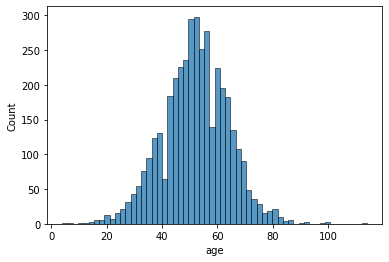

In [94]:
# Vidime ze vek ma takmer normalne rozdelenie
new_df = vypocet_veku(new_df)
sns.histplot(new_df['age'])

In [95]:
def knn_nahradenie(data):
    imputer = KNNImputer(n_neighbors=5)
    data = data.to_frame()
    data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)
    
    return data

In [96]:
# Funkcia pre naplnenie chýbajúcich hodnôt
def naplnenie_chybajucich_hodnot(data):
    # Naplnenie hodnôt podľa posledného riadku
    data["race"].fillna( method ='ffill', inplace = True)
    data["marital-status"].fillna( method ='ffill', inplace = True)
    data["occupation"].fillna( method ='ffill', inplace = True)
    data["pregnant"].fillna( 'F', inplace = True)
    data["relationship"].fillna( method ='ffill', inplace = True)
    data["education"].fillna( method ='ffill', inplace = True)
    data["class"].fillna( method ='ffill', inplace = True)
    data["income"].fillna( method ='ffill', inplace = True)
    data["native-country"].fillna( method ='ffill', inplace = True)
    data["workclass"].fillna( method ='ffill', inplace = True)
    # Naplnenie priemerom okolitych hodnot
    data["education-num"].fillna( method ='ffill', inplace = True)
    data["capital-gain"].fillna( method ='ffill', inplace = True)
    data["capital-loss"].fillna( method ='ffill', inplace = True)
    data["hours-per-week"].fillna( method ='ffill', inplace = True)
    # Naplnenie hodnôt priemerom
    data['fnlwgt'].fillna(data['fnlwgt'].mean(), inplace = True)
    data['skewness_glucose'].fillna(data['skewness_glucose'].mean(), inplace = True)
    data['mean_glucose'].fillna(data['mean_glucose'].mean(), inplace = True)
    data['std_glucose'].fillna(data['std_glucose'].mean(), inplace = True)
    data['kurtosis_glucose'].fillna(data['kurtosis_glucose'].mean(), inplace = True)
    
    return data

In [138]:
new_df = naplnenie_chybajucich_hodnot(new_df)
new_df.isnull().sum() # Overenie, že nie sú žiadne NaN hodnoty
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3933 non-null   object 
 1   address           3933 non-null   object 
 2   age               3933 non-null   object 
 3   sex               3933 non-null   object 
 4   date_of_birth     3933 non-null   object 
 5   race              3933 non-null   object 
 6   marital-status    3933 non-null   object 
 7   occupation        3933 non-null   object 
 8   pregnant          3933 non-null   object 
 9   education-num     3933 non-null   float64
 10  relationship      3933 non-null   object 
 11  skewness_glucose  3933 non-null   float64
 12  mean_glucose      3933 non-null   float64
 13  capital-gain      3933 non-null   float64
 14  kurtosis_glucose  3933 non-null   float64
 15  education         3933 non-null   object 
 16  fnlwgt            3933 non-null   float64


In [98]:
# Funkcia pre zistenie outlierov - použijeme IQR metódu
# Outliery nahradíme hraničnými hodnotami - nevymažeme ich
def vychylene_hodnoty(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1  
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    for i in data:
        if i < lower:
            data = data.replace(i, lower)
        elif i > upper:
            data = data.replace(i, upper)
            
    return data

In [99]:
# Funkcia pre nahradenie všetkých outlierov - robíme to len tam, kde to dáva zmysel - teda hlavne glucose a oxygen hodnoty
def nahradenie_vsetkych_outlierov(data):
    data['hours-per-week'] = vychylene_hodnoty(data['hours-per-week'])
    data['fnlwgt'] = vychylene_hodnoty(data['fnlwgt'])
    data['skewness_glucose'] = vychylene_hodnoty(data['skewness_glucose'])
    data['mean_glucose'] = vychylene_hodnoty(data['mean_glucose'])
    data['kurtosis_glucose'] = vychylene_hodnoty(data['kurtosis_glucose'])
    data['std_glucose'] = vychylene_hodnoty(data['std_glucose'])
    data['mean_oxygen'] = vychylene_hodnoty(data['mean_oxygen'])
    data['std_oxygen'] = vychylene_hodnoty(data['std_oxygen'])
    data['skewness_oxygen'] = vychylene_hodnoty(data['skewness_oxygen'])
    data['kurtosis_oxygen'] = vychylene_hodnoty(data['kurtosis_oxygen'])
    
    return data

In [100]:
new_df = nahradenie_vsetkych_outlierov(new_df)
new_df.head()

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651, East Andrew, OH 53211",44,Male,1975-10-14,White,Never-married,Sales,F,6.0,...,55.728851,<=50K,United-States,32.5,0.0,Self-emp-inc,3.797659,20.377356,7.090556,59.477657
1,Ernest Kline,"391 Ball Road Suite 961, Flowersborough, IN 57550",51,Male,1968-08-01,White,Never-married,Sales,F,13.0,...,49.028790,<=50K,United-States,40.0,0.0,Private,1.978261,18.236633,9.688143,97.076476
2,Harold Hendriks,"8702 Vincent Square, New Jerryfurt, CO 30614",53,Male,1966-08-13,White,Married-civ-spouse,Craft-repair,F,9.0,...,49.337327,<=50K,United-States,47.0,0.0,Private,3.693980,20.177142,7.222250,60.782985
3,Randy Baptiste,"2751 Harris Crossroad, West Ashley, CA 30311",53,Male,1966-04-08,White,Married-civ-spouse,Protective-serv,F,9.0,...,45.452735,<=50K,United-States,50.0,0.0,Local-gov,2.481605,18.486201,9.694549,105.717695
4,Anthony Colucci,"904 Robert Cliffs Suite 186, West Kyle, CO 77139",66,Female,1953-02-19,White,Divorced,Exec-managerial,F,10.0,...,49.720014,<=50K,United-States,40.0,0.0,Federal-gov,1.187291,10.441750,15.450073,298.135801


array([[<AxesSubplot:title={'center':'skewness_glucose'}>,
        <AxesSubplot:title={'center':'mean_glucose'}>],
       [<AxesSubplot:title={'center':'kurtosis_glucose'}>,
        <AxesSubplot:title={'center':'std_glucose'}>]], dtype=object)

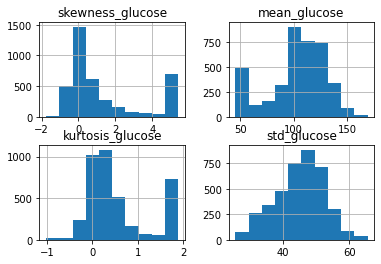

In [101]:
# Histogram atribútov glukózy pred power transform - slúži na neskoršie porovnanie
new_df[['skewness_glucose', 'mean_glucose', 'kurtosis_glucose', 'std_glucose']].hist()

c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

array([[<AxesSubplot:title={'center':'skewness_glucose'}>,
        <AxesSubplot:title={'center':'mean_glucose'}>],
       [<AxesSubplot:title={'center':'kurtosis_glucose'}>,
        <AxesSubplot:title={'center':'std_glucose'}>]], dtype=object)

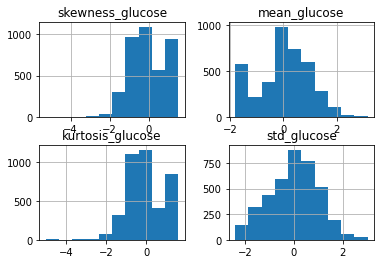

In [102]:
# Power transform pre atribúty glukózy
# Použijeme Yeo-Johnson metódu, keďže máme aj záporné dáta
def power_transform_glucose(data):
    glucose = data[["skewness_glucose", "mean_glucose", "kurtosis_glucose", "std_glucose"]].to_numpy()
    pt = PowerTransformer(method='yeo-johnson')
    glucose = pt.fit_transform(glucose)

    for i in range(len(data)):
        data['skewness_glucose'][i] = glucose[i][0]
        data['mean_glucose'][i] = glucose[i][1]    
        data['kurtosis_glucose'][i] = glucose[i][2]
        data['std_glucose'][i] = glucose[i][3]
    
    return data

new_df = power_transform_glucose(new_df)
# Znova histogram pre porovnanie - vidíme, že sa nám trochu zlepšila distribúcia - pripomina viac normalne rozdelenie, no pri skewness a kurtosis glucose máme
# aj zvláštne negatívne hodnoty - až za -4
new_df[['skewness_glucose', 'mean_glucose', 'kurtosis_glucose', 'std_glucose']].hist()

array([[<AxesSubplot:title={'center':'skewness_oxygen'}>,
        <AxesSubplot:title={'center':'mean_oxygen'}>],
       [<AxesSubplot:title={'center':'kurtosis_oxygen'}>,
        <AxesSubplot:title={'center':'std_oxygen'}>]], dtype=object)

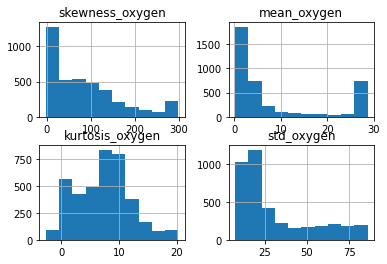

In [103]:
# Podobne ako pri glukóze - tu ale viac vidíme, akú zlú distribúciu majú tieto hodnoty
new_df[['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']].hist()

c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD 

array([[<AxesSubplot:title={'center':'skewness_oxygen'}>,
        <AxesSubplot:title={'center':'mean_oxygen'}>],
       [<AxesSubplot:title={'center':'kurtosis_oxygen'}>,
        <AxesSubplot:title={'center':'std_oxygen'}>]], dtype=object)

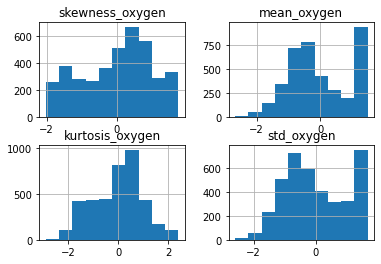

In [104]:
# Power Transform pre atribúty kyslíka
def power_transform_oxygen(data):
    oxygen = data[['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']].to_numpy()
    pt = PowerTransformer(method='yeo-johnson')
    oxygen = pt.fit_transform(oxygen)

    for i in range(len(data)):
        data['skewness_oxygen'][i] = oxygen[i][0]
        data['mean_oxygen'][i] = oxygen[i][1]    
        data['kurtosis_oxygen'][i] = oxygen[i][2]
        data['std_oxygen'][i] = oxygen[i][3]
        
    return data    

new_df = power_transform_oxygen(new_df)
# Tu pekne vidíme, ako sa nám zlepšila distribúcia hodnôt - najmä mean a std oxygen
new_df[['skewness_oxygen', 'mean_oxygen', 'kurtosis_oxygen', 'std_oxygen']].hist()

In [105]:
# Funkcia pre kódovanie kategorických atribútov
# Použili sme Ordinal Encoder - prišiel nám ako najlepšie riešenie - hlavne sme chceli, aby počet stĺpcov zostal rovnaký
# Použijeme ho na stĺpce, kde to dáva zmysel - teda nie stĺpce ako Meno alebo Adresa
def encoder(data):
    ce_ordinal = ce.OrdinalEncoder(cols=['sex', 'race', 'pregnant', 'marital-status', 'occupation', 'relationship', 'income', 'native-country', 'workclass'])
    
    return ce_ordinal.fit_transform(data)

In [106]:
# Trieda pre vlastný function transformer - použijeme ho v pipeline
# Umožňuje nám jednoducho transformovať dáta pomocou našich funkcií - ako parameter berie názov funkcie
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

In [107]:
# Pipeline pre jednoduchšie spracovanie dát - používam DaraframeFunctionTransformer, kde máme postupne ako parametre všetky naše
# funkcie, ktoré sme vytvorili na predspracovanie dát
pipe = Pipeline([('adresa', DataframeFunctionTransformer(uprav_adresu)),
                ('pohlavie', DataframeFunctionTransformer(uprav_pohlavie)),
                ('tehotna', DataframeFunctionTransformer(uprav_tehotna)),
                ('datum', DataframeFunctionTransformer(uprav_datum)),
                ('medical_info', DataframeFunctionTransformer(uprav_medical_info)),
                ('oxygen_numeric', DataframeFunctionTransformer(oxygen_to_numeric)),
                ('vek', DataframeFunctionTransformer(vypocet_veku)),
                ('chybajuce_hodnoty', DataframeFunctionTransformer(naplnenie_chybajucich_hodnot)),
                ('outliers', DataframeFunctionTransformer(nahradenie_vsetkych_outlierov)),
                ('glucose', DataframeFunctionTransformer(power_transform_glucose)),
                ('oxygen', DataframeFunctionTransformer(power_transform_oxygen)),
                ('encoder', DataframeFunctionTransformer(encoder))])

In [108]:
# Pre overenie, či náš pipeline funguje, spojíme naše dve tabuľky dokopy - rovnako ako to bolo ku začiatku notebooku
new_df_check = pd.merge(df2,df1,how='left',left_on=['name','address'],right_on=['name','address'])

In [109]:
# Spravíme fit a transform pre tieto dáta - pomocou pipe
processed_data = pipe.fit_transform(new_df_check)

c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\asus\documents\env_name\env_name\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD 

In [110]:
# Vidíme, že všetko prebehlo správne a máme spracované naše dáta
processed_data_df = pd.DataFrame(processed_data)
processed_data_df

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651, East Andrew, OH 53211",44,1,1975-10-14,1,1,1,1,6.0,...,1.476628,1,1,32.5,0.0,1,-0.081379,-0.190130,0.025765,0.067729
1,Ernest Kline,"391 Ball Road Suite 961, Flowersborough, IN 57550",51,1,1968-08-01,1,1,1,1,13.0,...,0.502971,1,1,40.0,0.0,2,-0.787782,-0.399843,0.549108,0.472478
2,Harold Hendriks,"8702 Vincent Square, New Jerryfurt, CO 30614",53,1,1966-08-13,1,2,2,1,9.0,...,0.546566,1,1,47.0,0.0,2,-0.110214,-0.208312,0.053238,0.084095
3,Randy Baptiste,"2751 Harris Crossroad, West Ashley, CA 30311",53,1,1966-04-08,1,2,3,1,9.0,...,0.006751,1,1,50.0,0.0,3,-0.537731,-0.373527,0.550355,0.551033
4,Anthony Colucci,"904 Robert Cliffs Suite 186, West Kyle, CO 77139",66,2,1953-02-19,1,3,4,1,10.0,...,0.600809,1,1,40.0,0.0,4,-1.343095,-1.643365,1.607601,1.741088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,Douglas Starkweather,"8582 Lee Roads, Costaburgh, SC 21897",55,1,1964-06-21,1,3,8,1,9.0,...,0.905048,1,1,52.5,0.0,5,-1.174461,-0.796977,1.013548,0.964303
3929,Christopher Winfield,"68430 Erik Terrace Suite 279, Port Adamborough...",33,2,1986-02-09,1,2,1,1,9.0,...,0.266487,1,1,32.5,0.0,2,0.535360,0.424213,-0.427302,-0.439776
3930,Salvador Donnell,"Unit 8416 Box 3801, DPO AE 31166",59,2,1960-09-04,1,2,9,1,9.0,...,0.664470,1,1,40.0,0.0,4,-0.860160,-1.207827,0.797040,1.016163
3931,Wesley Goldstein,"34420 Brian Stream, Lake Michaeltown, MS 01832",54,2,1965-04-09,1,2,9,1,9.0,...,0.676778,1,1,40.0,0.0,5,0.283788,0.306849,-0.220582,-0.241575


In [111]:
# Vytvoríme nový csv súbor s už upravenými dátami
processed_data_df.to_csv('processed_data.csv', index=False)

In [112]:
# Upravené dáta
processed = "processed_data.csv"
df = pd.read_csv(processed)
df.head()

,name,address,age,sex,date_of_birth,race,marital-status,occupation,pregnant,education-num,...,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651, East Andrew, OH 53211",44,1,1975-10-14,1,1,1,1,6.0,...,1.476628,1,1,32.5,0.0,1,-0.081379,-0.190130,0.025765,0.067729
1,Ernest Kline,"391 Ball Road Suite 961, Flowersborough, IN 57550",51,1,1968-08-01,1,1,1,1,13.0,...,0.502971,1,1,40.0,0.0,2,-0.787782,-0.399843,0.549108,0.472478
2,Harold Hendriks,"8702 Vincent Square, New Jerryfurt, CO 30614",53,1,1966-08-13,1,2,2,1,9.0,...,0.546566,1,1,47.0,0.0,2,-0.110214,-0.208312,0.053238,0.084095
3,Randy Baptiste,"2751 Harris Crossroad, West Ashley, CA 30311",53,1,1966-04-08,1,2,3,1,9.0,...,0.006751,1,1,50.0,0.0,3,-0.537731,-0.373527,0.550355,0.551033
4,Anthony Colucci,"904 Robert Cliffs Suite 186, West Kyle, CO 77139",66,2,1953-02-19,1,3,4,1,10.0,...,0.600809,1,1,40.0,0.0,4,-1.343095,-1.643365,1.607601,1.741088


In [140]:
# Hodnoty vztahov po uprave tabulky - najskor si vsimneme vysoke hodnoty medzi hodnotami kyslika - vsetky su vo vztahu okolo 0,98 resp. -0,98
df.corr()

,age,sex,race,marital-status,occupation,pregnant,education-num,relationship,skewness_glucose,mean_glucose,...,std_glucose,income,native-country,hours-per-week,capital-loss,workclass,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
age,1.000000,0.004410,-0.017811,0.018468,0.008128,0.016624,0.009107,-0.009381,0.229585,-0.244453,...,-0.148283,-0.019270,0.014923,0.001058,0.005307,0.010070,0.237987,0.230525,-0.220112,-0.226557
sex,0.004410,1.000000,0.070098,0.129037,0.089554,0.170665,-0.005258,0.197390,-0.019420,0.015807,...,0.016148,-0.225655,0.027263,-0.228262,-0.031675,0.009220,-0.010455,-0.010676,0.008973,0.010962
race,-0.017811,0.070098,1.000000,0.041308,0.022756,0.032029,-0.012333,0.062758,-0.006740,-0.004146,...,0.009204,-0.043752,0.278363,-0.048565,0.020203,0.018210,-0.003234,-0.002287,0.000769,-0.000221
marital-status,0.018468,0.129037,0.041308,1.000000,-0.020424,0.007117,-0.061525,0.257982,-0.001141,0.006363,...,0.006897,0.019951,0.036268,0.047672,0.008865,-0.001626,-0.015395,-0.011569,0.020824,0.016318
occupation,0.008128,0.089554,0.022756,-0.020424,1.000000,0.001355,0.105370,0.021973,-0.004760,0.018598,...,0.012241,-0.014797,0.039598,-0.039345,-0.002988,0.059484,0.007853,0.010873,-0.011089,-0.011286
pregnant,0.016624,0.170665,0.032029,0.007117,0.001355,1.000000,0.019320,0.003709,-0.001724,0.001840,...,-0.008386,-0.034435,-0.007295,-0.054154,0.009825,-0.034229,-0.012660,-0.018412,0.013978,0.016683
education-num,0.009107,-0.005258,-0.012333,-0.061525,0.105370,0.019320,1.000000,0.035568,0.014860,-0.027624,...,-0.014559,0.298985,-0.050852,0.183731,0.076587,0.034779,0.014972,0.009938,-0.011647,-0.012865
relationship,-0.009381,0.197390,0.062758,0.257982,0.021973,0.003709,0.035568,1.000000,-0.002274,-0.007428,...,0.014177,0.170433,0.054239,0.073535,0.021623,-0.001209,0.013401,0.013114,-0.015533,-0.014964
skewness_glucose,0.229585,-0.019420,-0.006740,-0.001141,-0.004760,-0.001724,0.014860,-0.002274,1.000000,-0.743873,...,-0.849251,-0.008967,0.005283,0.029330,-0.014380,-0.001013,0.422431,0.413542,-0.390384,-0.403557
mean_glucose,-0.244453,0.015807,-0.004146,0.006363,0.018598,0.001840,-0.027624,-0.007428,-0.743873,1.000000,...,0.582719,0.010987,-0.017093,-0.012805,0.009179,0.001734,-0.438270,-0.429744,0.409139,0.421149


<AxesSubplot:xlabel='skewness_oxygen', ylabel='kurtosis_oxygen'>

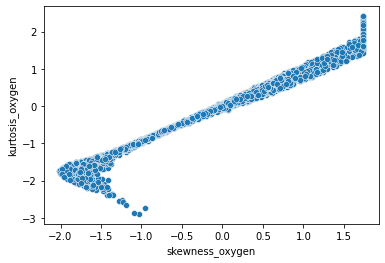

In [141]:
# To sa nam zobrazuje aj na grafoch, zavislost spicatosti od skrivce
sns.scatterplot(data=df, x='skewness_oxygen', y='kurtosis_oxygen')

<AxesSubplot:xlabel='mean_oxygen', ylabel='kurtosis_oxygen'>

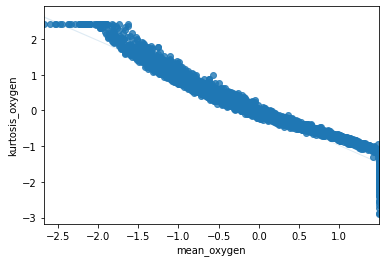

In [142]:
sns.regplot(x="mean_oxygen", y="kurtosis_oxygen", data=df)

<AxesSubplot:xlabel='skewness_glucose', ylabel='kurtosis_glucose'>

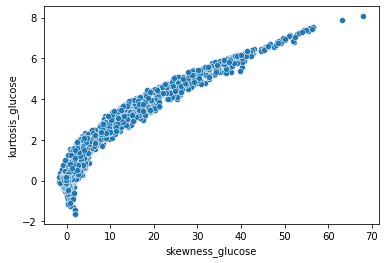

In [127]:
# Naopak vztahy medzi hodnotami glukozy sa nam dost prepadli - grafy zobrazuju vztahy pred a po doplneni a transformacii hodnot
sns.scatterplot(data=df1, x='skewness_glucose', y='kurtosis_glucose')

<AxesSubplot:xlabel='skewness_glucose', ylabel='kurtosis_glucose'>

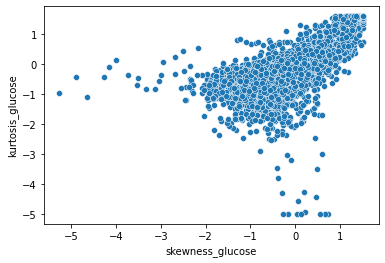

In [143]:
sns.scatterplot(data=df, x='skewness_glucose', y='kurtosis_glucose')

<AxesSubplot:xlabel='mean_glucose', ylabel='kurtosis_glucose'>

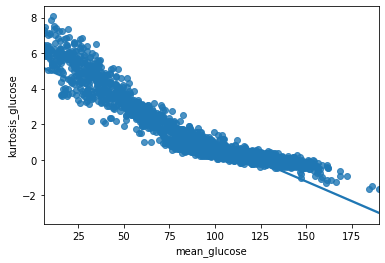

In [130]:
sns.regplot(x="mean_glucose", y="kurtosis_glucose", data=df1)
#povodny

<AxesSubplot:xlabel='mean_glucose', ylabel='kurtosis_glucose'>

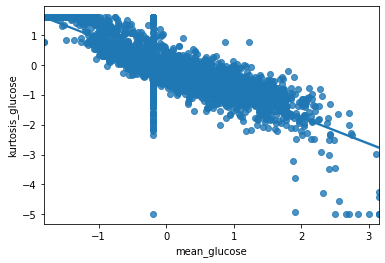

In [144]:
sns.regplot(x="mean_glucose", y="kurtosis_glucose", data=df)
#po uprave
# v tomto grafe si mozeme vsimnut ake velke mnozstvo chybajucich hodnot bolo v mean_glucose, ktore sme nahradili priemerom, co zmenilo ich samotny vztah

<AxesSubplot:xlabel='skewness_glucose', ylabel='skewness_oxygen'>

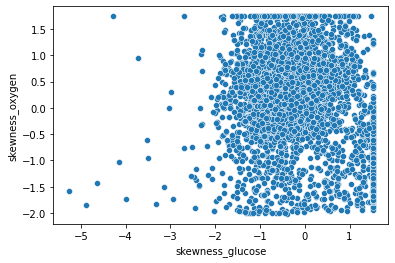

In [145]:
# V tychto grafoch vidime ze vztahy medzi rovnakymi hodnotami kyslika a glukozy od seba moc nezavisia, aj ich hodnoty boli iba okolo 0,4-0,5
sns.scatterplot(data=df, x='skewness_glucose', y='skewness_oxygen')

<AxesSubplot:xlabel='std_glucose', ylabel='std_oxygen'>

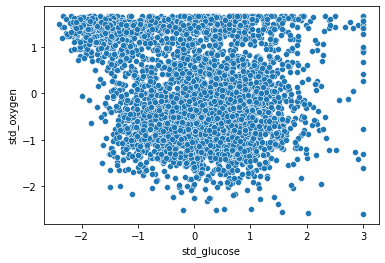

In [148]:
sns.scatterplot(data=df, x='std_glucose', y='std_oxygen')

<AxesSubplot:xlabel='kurtosis_glucose', ylabel='kurtosis_oxygen'>

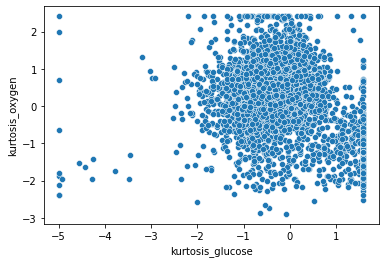

In [147]:
sns.scatterplot(data=df, x='kurtosis_glucose', y='kurtosis_oxygen')

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

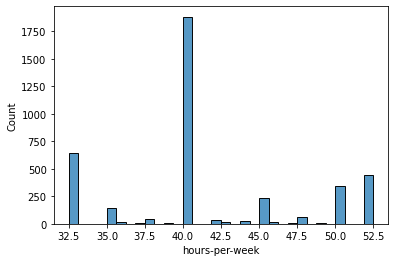

In [146]:
# mozeme vidiet ze prevazna vacsina ludi pracuje standard - 40 hodin do tyzdna
sns.histplot(df['hours-per-week'])